## Graphs of incompleteness by protein, incompleteness by drug perturbation
### TODO: add a cumulative incompleteness graph

C:\Users\abdul\AppData\Local\Temp\ipykernel_27960\2516021705.py:5: DtypeWarning: Columns (8546) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


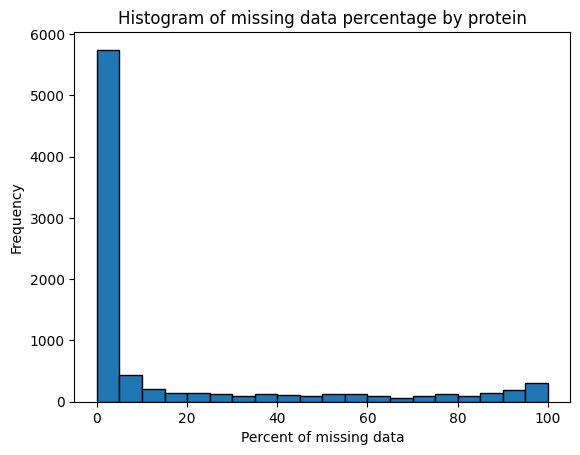

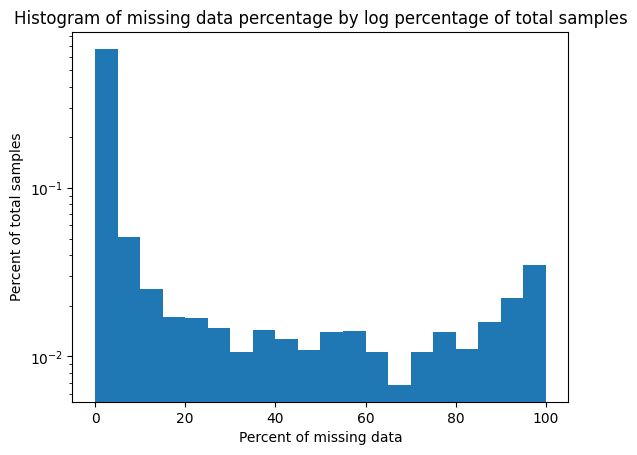

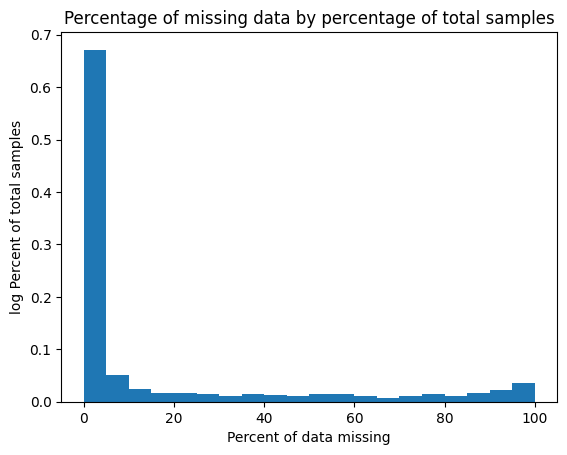

fully complete data: 4187
overall data columns: 8556


In [18]:
import pandas as pd

# Load the data from the CSV file
data_path = r'C:\Users\abdul\OneDrive - University of Cambridge\Desktop\MDRA\cellbox_torch\preprocessing\data.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the dataframe
df.head()

import matplotlib.pyplot as plt
import numpy as np
# Plot a histogram with the x axis being the percent of data for each label that is incomplete, 
# and the y axis being frequency, put them into bins of 5% each
plt.title('Histogram of missing data percentage by protein')
plt.hist(df.isnull().mean(axis=0)*100, bins=np.arange(0, 105, 5), edgecolor='black')
plt.xlabel('Percent of missing data')
plt.ylabel('Frequency')

plt.show()
df_nan = df.isnull().mean(axis=0)*100
plt.hist(df_nan, bins=np.arange(0, 105, 5), weights=np.ones_like(df_nan)/len(df_nan))
plt.title('Histogram of missing data percentage by log percentage of total samples')
plt.yscale('log')
plt.xlabel('Percent of missing data')
plt.ylabel('Percent of total samples')
plt.show()
plt.title('Percentage of missing data by percentage of total samples')
plt.hist(df_nan, bins=np.arange(0, 105, 5), weights=np.ones_like(df_nan)/len(df_nan))
plt.xlabel('Percent of data missing')
plt.ylabel('log Percent of total samples')
plt.show()
#coun the number of features with no missing data:
# subtract off 13 to get the nubmer of proteins 
df_nonan = df.isnull().mean(axis=0)*100
df_nonan = df_nonan[df_nonan == 0]
print('fully complete data: '+str(len(df_nonan)))
print('overall data columns: '+str(len(df.columns)))

## histogram of protein values and what statistical distribution best describes the data
### TODO: add a histogram of data values within a few different proteins so we can see if a single protein follows the distribution

In [19]:
# now plotting which of the proteins has the largest standard deviation in measurement:
#first normalizing the data between 0 and 1 (in the event protein quantities are just generally large
#only number dataframe:
only_num=df.iloc[:, 1:-12]
onenorm_df= only_num.div(only_num.max(axis=0), axis=1)

Mmean value of all protein values:  20.543985041467568


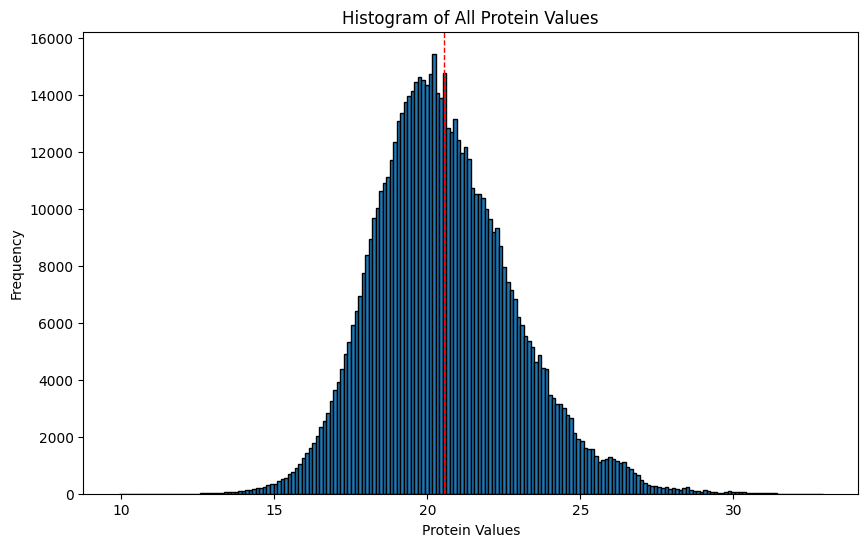

131979
A0A024RBG1     3
A0A096LP01     5
A0A0B4J2F0    78
A0A0U1RRL7    90
A0AVF1         2
              ..
pathway        1
target         1
Gene.Name     41
Uniprot.ID     3
note          89
Length: 4369, dtype: int64
804264
16.409910178747616


In [26]:
from scipy import stats

plt.figure(figsize=(10, 6))
plt.hist(only_num.values.flatten(), bins=200, edgecolor='black')
plt.title('Histogram of All Protein Values')
plt.xlabel('Protein Values')
plt.ylabel('Frequency')
#calculating mean of all values:
mean_value = np.nanmean(only_num.values.flatten())
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label='Mean Value')
print('Mmean value of all protein values: ', mean_value)
plt.show()

#NaN counter:
#count the number of NaN values in the dataframe
df_nan = df.isnull().sum(axis=0)
df_nan = df_nan[df_nan > 0]
print (sum(df_nan.values))
print(df_nan)

print(len(df.values.flatten()))
print(sum(df_nan.values/len(df.values.flatten()))*100)
# Fit the data to different statistical distributions and determine the best fit
data = only_num.values.flatten()
data = data[~np.isnan(data)]  # Remove NaN values





In [ ]:
# Fit the histogram to different statistical distributions
best_fit_distribution = None
best_p_value = 0
best_params = None
# List of distributions to check
distributions = [
    stats.norm,
    stats.poisson,
    stats.binom,
    stats.expon,
    stats.gamma,
    stats.bernoulli,
    stats.lognorm,
    stats.beta,
    stats.uniform,
    stats.weibull_min,
    stats.pareto,
]
# Iterate through the list of distributions
for distribution in distributions:
    try:
        # Fit the distribution to the data
        params = distribution.fit(data)
        
        # Perform the Kolmogorov-Smirnov test
        ks_stat, p_value = stats.kstest(data, distribution.name, args=params)
        
        # Check if this distribution has the best p-value so far
        if p_value > best_p_value:
            best_fit_distribution = distribution
            best_p_value = p_value
            best_params = params
    except Exception as e:
        # Skip distributions that fail to fit
        continue


KeyboardInterrupt: 

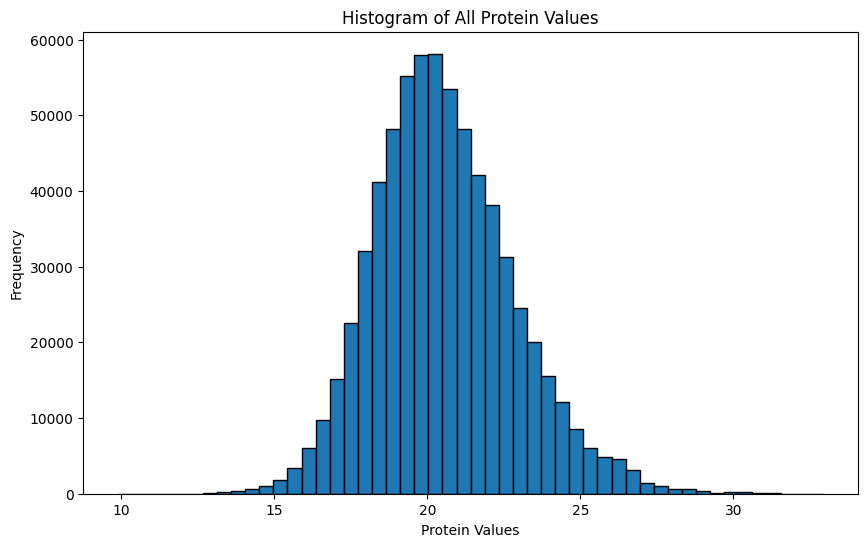

In [ ]:
from scipy import stats

plt.figure(figsize=(10, 6))
plt.hist(only_num.values.flatten(), bins=50, edgecolor='black')
plt.title('Histogram of All Protein Values')
plt.xlabel('Protein Values')
plt.ylabel('Frequency')
plt.show()

# Flatten the data and remove NaN values
data = only_num.values.flatten()
data = data[~np.isnan(data)]


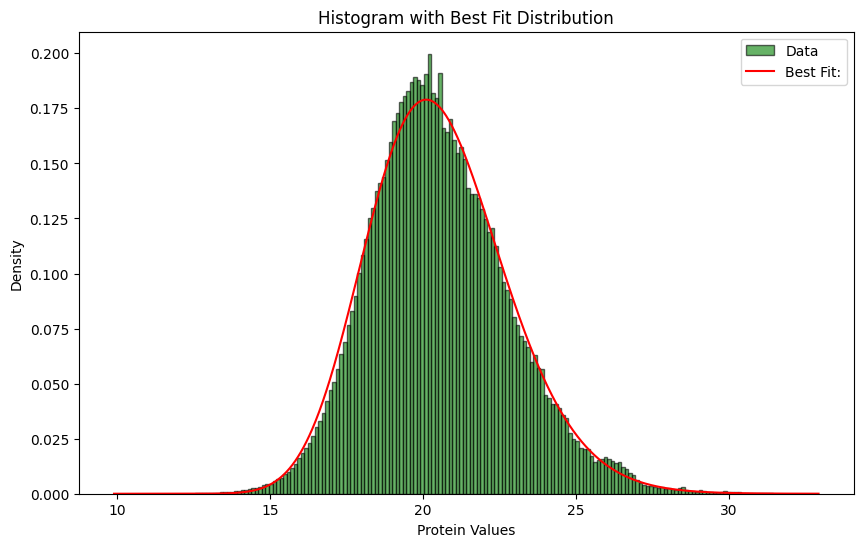

Best Fit Distribution: lognorm
P-value: 4.06855043737645e-83
Parameters: (0.12979793266238562, 3.0783118444171187, 17.319020545034142)


In [ ]:

# Plot the histogram and the best fit
plt.figure(figsize=(10, 6))
plt.hist(data, bins=200, density=True, alpha=0.6, color='g', edgecolor='black', label='Data')

# Generate the best fit line
if best_fit_distribution is not None:
    x = np.linspace(min(data), max(data), 1000)
    pdf = best_fit_distribution.pdf(x, *best_params)
    plt.plot(x, pdf, 'r-', label=f'Best Fit:')

plt.title('Histogram with Best Fit Distribution')
plt.xlabel('Protein Values')
plt.ylabel('Density')
plt.legend()
plt.show()

# Print the best fit distribution and its parameters
if best_fit_distribution is not None:
    print(f"Best Fit Distribution: {best_fit_distribution.name}")
    print(f"P-value: {best_p_value}")
    print(f"Parameters: {best_params}")




## Figuring out which proteins vary the most
### TODO: make sure the logic on how I'm normalizing the protein values is solid (I normalize by the mean of each column) such that the mean of each column is 1
### TODO: test if normalizing by max yields the same or similar results as normalizing by mean


C:\Users\abdul\AppData\Local\Temp\ipykernel_27960\2964324889.py:7: DtypeWarning: Columns (8546) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


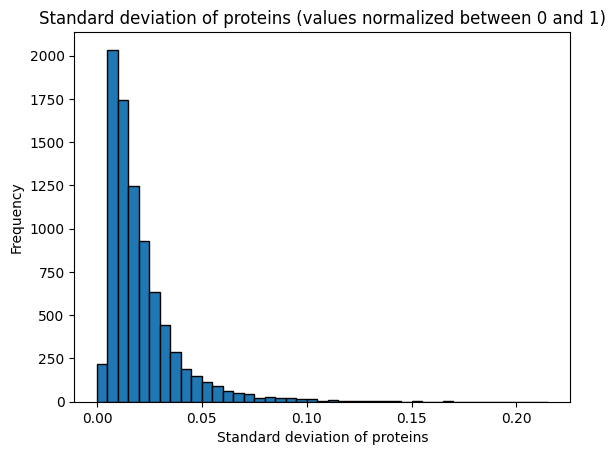

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the CSV file
data_path = r'C:\Users\abdul\OneDrive - University of Cambridge\Desktop\MDRA\cellbox_torch\preprocessing\data.csv'
df = pd.read_csv(data_path)

only_num=df.iloc[:, 1:-12]
onenorm_df= only_num.div(only_num.mean(axis=0), axis=1) #it is generally true, but adding flag so that it's clear
onenorm_df.head()

# Plot the histogram of the standard deviation of proteins
plt.title('Standard deviation of proteins (values normalized between 0 and 1)')
plt.hist(onenorm_df.std(axis=0), bins=np.arange(0, .22, 0.005), edgecolor='black')
plt.xlabel('Standard deviation of proteins')
plt.ylabel('Frequency')
plt.show()



In [ ]:
#making a sorted list of all the standard deviations 
std_devs=onenorm_df.std(axis=0).sort_values(ascending=False)
std_devs.head()
#checking completeness of the various entries:
counter=0
for i in std_devs.index:
    if(counter<50):
        ratio=onenorm_df[i].isnull().sum()/len(onenorm_df[i])
        print(i)
        print(ratio)
counter+=1

#printing the top proteins with high variance:
std_devs_greater_0_11=std_devs[std_devs > 0.12]
keys_greater_0_11=std_devs_greater_0_11.index.tolist()
print(keys_greater_0_11)

#Diagnosing errors: there are some values that seem exact duplicates in the keys greater011, is there duplicated
# print(onenorm_df['P06702'].to_numpy())
# print(onenorm_df['P05109'].to_numpy())
#Turns out I'm stupid and its the ratio of the number of Nan's which we do expect to generate duplicates


P06702
0.9787234042553191
P05109
0.9787234042553191
P15941
0.9574468085106383
Q92556
0.9787234042553191
O14494
0.9574468085106383
P02511
0.925531914893617
P31151
0.9574468085106383
O75147
0.9680851063829787
P80723
0.8404255319148937
Q96RW7
0.4787234042553192
P19012
0.5
Q9HAV0
0.9680851063829787
P09467
0.9468085106382979
Q04828
0.9574468085106383
P19013
0.7659574468085106
Q53RD9
0.9574468085106383
Q16352
0.9574468085106383
Q9H3U7
0.8936170212765957
P02765
0.3723404255319149
Q0ZGT2
0.9574468085106383
Q13201
0.925531914893617
P43358
0.5638297872340425
P23141
0.8617021276595744
O60547
0.9148936170212766
A6NLP5
0.9574468085106383
P32754
0.9787234042553191
P50479
0.9574468085106383
Q9HCH5
0.9787234042553191
P24821
0.9574468085106383
Q5HYK7
0.8723404255319149
P15309
0.851063829787234
O14503
0.9787234042553191
Q9C0H9
0.8723404255319149
Q9Y646
0.9361702127659575
P14921
0.9680851063829787
P08253
0.9787234042553191
O94875
0.9680851063829787
P02749
0.9574468085106383
P05019
0.9787234042553191
Q925

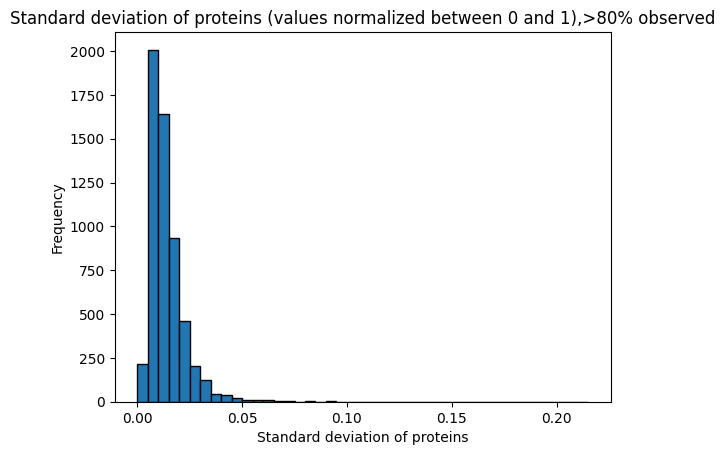

In [ ]:
#now getting the top 100 variable proteins that are greater than 95% complete
percent_comp=.95
onenorm_df_dropped=onenorm_df.dropna(axis=1, thresh=len(onenorm_df)*percent_comp)
onenorm_df_dropped.head()

#plotting the histogram
plt.title('Standard deviation of proteins (values normalized between 0 and 1),>80% observed')
plt.hist(onenorm_df_dropped.std(axis=0), bins=np.arange(0, .22, 0.005), edgecolor='black')
plt.xlabel('Standard deviation of proteins')
plt.ylabel('Frequency')
plt.show()


In [ ]:
#getting the top 100 proteins and going from there:

std_devs=onenorm_df_dropped.std(axis=0).sort_values(ascending=False)

#printing the top 100 proteins with high variance:
# for i in range (100):
#     print('protein ID: ' +str(std_devs.index[i])+ '  std dev: ' + str(std_devs.values[i]))

#generating a new file with the top 100 proteins
top_100_proteins=std_devs.index[:100].tolist()
top_100_proteins_df=pd.concat([df.iloc[:, 0], df[top_100_proteins],df.iloc[:,-12:]], axis=1)
top_100_proteins_df.to_csv(r'C:\Users\abdul\OneDrive - University of Cambridge\Desktop\MDRA\cellbox_torch\preprocessing\top_100_proteins.csv', index=False)


# TODO> verify the top 100 proteins; 
### check expression levels X (generally ok, there are some that are low, but we will deal with them after a first test)
### check that they are in human uniprot (they all are)
### Check for similar fragmenting with the bovine/other animal proteins. (I can't figure out how to do it, for the fetoprotein, it is only 50% similar)


In [ ]:
import pandas as pd
all_human_proteins=pd.read_csv(r'C:\Users\abdul\OneDrive - University of Cambridge\Desktop\MDRA\cellbox_torch\preprocessing\human_proteome.csv')
all_human_proteins.head()

Entry    Reviewed        Entry Name  \
0  A0A087WZ06  unreviewed  A0A087WZ06_HUMAN   
1  A0A087WZT3  unreviewed  A0A087WZT3_HUMAN   
2  A0A087X0I6  unreviewed  A0A087X0I6_HUMAN   
3  A0A087X0K9  unreviewed  A0A087X0K9_HUMAN   
4  A0A087X1C5    reviewed       CP2D7_HUMAN   

                                       Protein names      Gene Names  \
0  non-specific serine/threonine protein kinase (...            STK3   
1                           BOLA2-SMG1P6 readthrough    BOLA2-SMG1P6   
2  non-specific serine/threonine protein kinase (...           MARK1   
3                           Tight junction protein 1  TJP1 hCG_27621   
4        Putative cytochrome P450 2D7 (EC 1.14.14.1)          CYP2D7   

               Organism  Length  \
0  Homo sapiens (Human)     380   
1  Homo sapiens (Human)      44   
2  Homo sapiens (Human)     796   
3  Homo sapiens (Human)    1768   
4  Homo sapiens (Human)     515   

                                       Function [CC]  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3                                                NaN  
4  FUNCTION: May be responsible for the metabolis...

In [ ]:
#checking they are all in the unuiprot
counter=0
for i in top_100_proteins_df.columns[1:-12]:
    if i in all_human_proteins['Entry'].values:
        print(f"Protein {i} found in human proteome database.")
        counter+=1
print('counter: ' + str(counter))

Protein P02771 found in human proteome database.
Protein Q96PX9 found in human proteome database.
Protein O94886 found in human proteome database.
Protein Q96S21 found in human proteome database.
Protein Q6DHV7 found in human proteome database.
Protein P19823 found in human proteome database.
Protein Q9GZU1 found in human proteome database.
Protein P01023 found in human proteome database.
Protein Q8IUE6 found in human proteome database.
Protein Q06033 found in human proteome database.
Protein P02774 found in human proteome database.
Protein Q96JY6 found in human proteome database.
Protein P36955 found in human proteome database.
Protein P23142 found in human proteome database.
Protein P02768 found in human proteome database.
Protein Q8WY22 found in human proteome database.
Protein O60783 found in human proteome database.
Protein P01024 found in human proteome database.
Protein P62070 found in human proteome database.
Protein Q9NPD3 found in human proteome database.
Protein Q01130 found

In [ ]:
#getting their functions:
data_on_top100=pd.DataFrame()
for i in top_100_proteins_df.columns[1:-12]:
    if i in all_human_proteins['Entry'].values:
        data_on_top100 = pd.concat([data_on_top100, all_human_proteins[all_human_proteins['Entry'] == i]], ignore_index=True)

data_on_top100.head()



Entry  Reviewed   Entry Name  \
0  P02771  reviewed   FETA_HUMAN   
1  Q96PX9  reviewed  PKH4B_HUMAN   
2  O94886  reviewed  CSCL1_HUMAN   
3  Q96S21  reviewed  RB40C_HUMAN   
4  Q6DHV7  reviewed   ADAL_HUMAN   

                                       Protein names  \
0  Alpha-fetoprotein (Alpha-1-fetoprotein) (Alpha...   
1  Pleckstrin homology domain-containing family G...   
2    CSC1-like protein 1 (Transmembrane protein 63A)   
3  Ras-related protein Rab-40C (Rar-like protein)...   
4  N6-Methyl-AMP deaminase (EC 3.5.4.-) (Adenosin...   

                  Gene Names              Organism  Length  \
0                  AFP HPAFP  Homo sapiens (Human)     609   
1          PLEKHG4B KIAA1909  Homo sapiens (Human)    1627   
2  TMEM63A KIAA0489 KIAA0792  Homo sapiens (Human)     807   
3         RAB40C RARL RASL8C  Homo sapiens (Human)     281   
4           MAPDA ADAL ADAL1  Homo sapiens (Human)     355   

                                       Function [CC]  
0  FUNCTION: Binds copper, nickel, and fatty acid...  
1  FUNCTION: Guanine nucleotide exchange factor (...  
2  FUNCTION: Mechanosensitive cation channel with...  
3  FUNCTION: Probable substrate-recognition compo...  
4  FUNCTION: Catalyzes the hydrolysis of the free...

In [ ]:
# checking that the expressions are reasonable:
for i in top_100_proteins_df.columns[1:-12]:
    print("protein" + str(i) + " mean: " + str(top_100_proteins_df[i].mean()) + " std: " + str(top_100_proteins_df[i].std()))
    #calculating mean of the means:
mean_of_means = top_100_proteins_df.iloc[:, 1:-12].mean().mean()
print("Mean of means: " + str(mean_of_means))

#can't figure out how to check bovine similarity; chat gpt gave this but I dont trust:
#Examples of High-Similarity Bovine Proteins
# Albumin (P02768)

# Human serum albumin shares approximately 76% sequence identity with bovine serum albumin. This significant similarity underscores their conserved structure and function across species. ​

# Lactoferrin (P02788)

# Human and bovine lactoferrins exhibit substantial structural homology and share common antigenic determinants, indicating a high degree of similarity. ​
# PubMed

# Caseins

# β-Casein: Bovine β-casein shares 91% sequence identity with its human counterpart.

# αS1-Casein: Bovine αS1-casein has about 29% identity with the human version, indicating less conservation.

# αS2-Casein: Bovine αS2-casein shows approximately 16% identity with the human form. ​
# JACI
# +1
# PubMed
# +1

# Proteins with Lower Similarity
# Some proteins in your list, such as P19823 (Interleukin-1 receptor antagonist) and Q96PX9 (Interleukin-1 receptor accessory protein), are cytokines or immune-related proteins. These tend to be less conserved across species, often exhibiting lower sequence identity between human and bovine forms.​

# Summary


proteinP02771 mean: 20.230709943010755 std: 2.061064233816909
proteinQ96PX9 mean: 23.77803133258064 std: 2.251556169734234
proteinO94886 mean: 18.995693873626372 std: 1.7228673791467872
proteinQ96S21 mean: 21.233005165434786 std: 1.815923617301067
proteinQ6DHV7 mean: 20.315445712580647 std: 1.7143273216636397
proteinP19823 mean: 23.03060537425532 std: 1.8868330538740843
proteinQ9GZU1 mean: 20.491526020217393 std: 1.6464363817898047
proteinP01023 mean: 22.16312400308511 std: 1.7586665986609582
proteinQ8IUE6 mean: 19.793830524777775 std: 1.4460884871720108
proteinQ06033 mean: 20.71047919645161 std: 1.4787159145219853
proteinP02774 mean: 19.542674894516125 std: 1.3783600926202686
proteinQ96JY6 mean: 19.158640062391303 std: 1.3415426378621957
proteinP36955 mean: 21.072856484731183 std: 1.4204539070756028
proteinP23142 mean: 20.48265192957447 std: 1.3795506517434477
proteinP02768 mean: 27.673509239574464 std: 1.8573099623093263
proteinQ8WY22 mean: 20.345025766881722 std: 1.2864113214698805


# TODO: run the elastic net regression using the generated datafile

c:\Users\abdul\.conda\envs\cellbox\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.000e+03, tolerance: 5.752e+00
  model = cd_fast.enet_coordinate_descent(


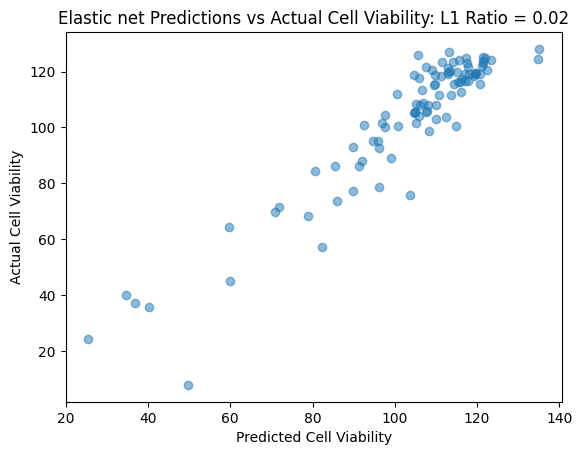

R^2: 0.8183951693513721 MSE: 79.59782140997976


c:\Users\abdul\.conda\envs\cellbox\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.468e+02, tolerance: 5.752e+00
  model = cd_fast.enet_coordinate_descent(


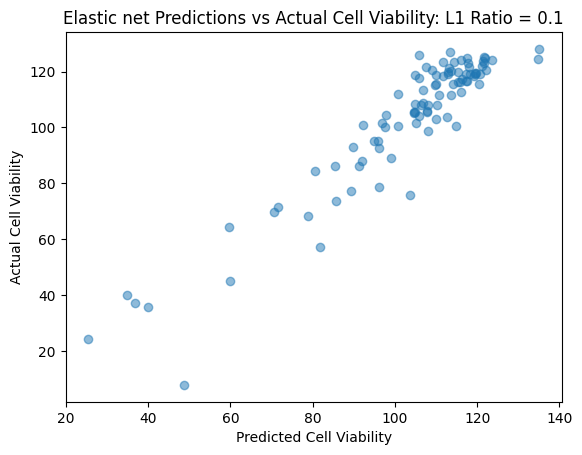

R^2: 0.8246100298581891 MSE: 77.39558591989305


c:\Users\abdul\.conda\envs\cellbox\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.744e+02, tolerance: 5.752e+00
  model = cd_fast.enet_coordinate_descent(


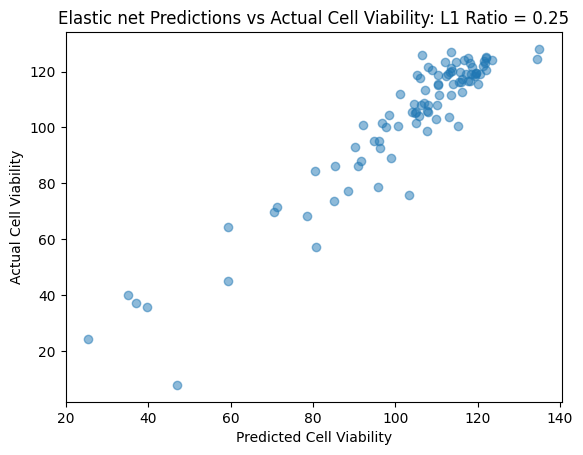

R^2: 0.8373442473843873 MSE: 72.80716669677763


c:\Users\abdul\.conda\envs\cellbox\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.325e+02, tolerance: 5.752e+00
  model = cd_fast.enet_coordinate_descent(


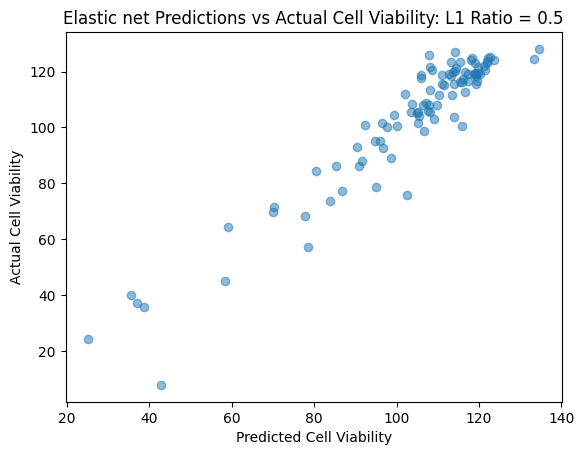

R^2: 0.8625265147031033 MSE: 63.41187700243204


c:\Users\abdul\.conda\envs\cellbox\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.269e+02, tolerance: 5.752e+00
  model = cd_fast.enet_coordinate_descent(


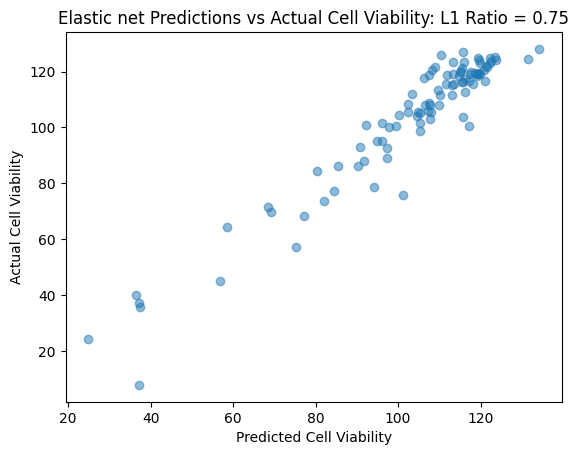

R^2: 0.8923559680103034 MSE: 51.928319852843586


c:\Users\abdul\.conda\envs\cellbox\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.814e+02, tolerance: 5.752e+00
  model = cd_fast.enet_coordinate_descent(


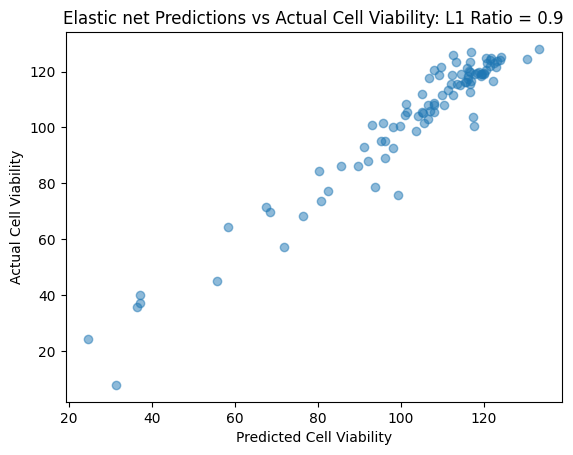

R^2: 0.9148413339583932 MSE: 42.878713493693816


c:\Users\abdul\.conda\envs\cellbox\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.665e+02, tolerance: 5.752e+00
  model = cd_fast.enet_coordinate_descent(


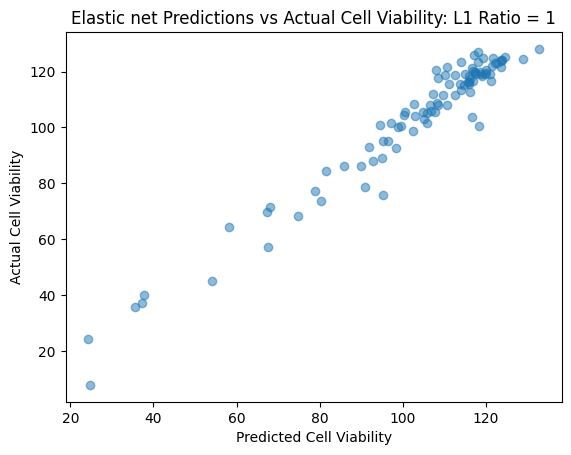

R^2: 0.9405425894300625 MSE: 31.319270082632872


In [ ]:
#
import sklearn as sklearn
import sklearn.linear_model
import sklearn.metrics
import sklearn.preprocessing
import sklearn.pipeline

cell_viability=top_100_proteins_df.iloc[:, 111].fillna(0)  # Cell viability is in column 111
l1_ratios=[0.02,0.1,0.25,0.5,.75,0.9,1]
proteinvalues=top_100_proteins_df.iloc[:, 1:-12].fillna(0)
#TODO standardize the features.
#alpha is the how much we want to consider L1 and L2 penalties
#l1_ratio is how much we want to consider L1 vs L2. L1 is lasso regression and L2 is ridge regression
#L1 is error penalty equal to value of the weight(encouraging sparsity)
#L2 is the error penalty equal to the square of the weight( and encourages small weights)


# implementing a parameter sweep:
coeff_run=[]
for l1_ratio in l1_ratios:
    elastic_net=sklearn.linear_model.ElasticNet(alpha=0.1, l1_ratio=l1_ratio, random_state=42,fit_intercept=True)
    elastic_net.fit(proteinvalues, cell_viability)
    sklearn.linear_model.ElasticNet()

    predictions=elastic_net.predict(proteinvalues)
    coeff_run.append(l1_ratio)
    coeff_run.append(elastic_net.coef_)

    plt.plot(predictions, cell_viability, 'o', alpha=0.5)
    plt.xlabel('Predicted Cell Viability')
    plt.ylabel('Actual Cell Viability')
    plt.title('Elastic net Predictions vs Actual Cell Viability:'+ f' L1 Ratio = {l1_ratio}')
    plt.show()
    r2=sklearn.metrics.r2_score(predictions,cell_viability)
    mse=sklearn.metrics.mean_squared_error(predictions,cell_viability)
    print('R^2: ' + str(r2)+ ' MSE: ' + str(mse))

In [ ]:
print(coeff_run)

# TODO implement log chagnes
## implement making sure protein targets of drugs are present
##  implement one hot encoding of drug? 
## TODO compute the value of the differential but not actual differential, just compare to protein output value
## leave one out with 70:30 split
## make a correlaton metric for each of the proteins and use that to correlate as well with cell viability.
## 

## TODO what drugs change the protein values the most?

In [ ]:
#what drugs change the proteins the most?
#first make a new dataframe that is the old one but z scored
import scipy.stats
df_z = only_num.apply(lambda x: scipy.stats.zscore(x, nan_policy='omit'), axis=0)
#filling in the unrecorded values with the minimum zscore value in each column
shifted_df_z=df_z.fillna(0, inplace=False)

# across each row sum up the Zscore values:
shifted_df_z.head()


A0A024RBG1  A0A096LP01  A0A0B4J2D5  A0A0B4J2F0  A0A0U1RRL7    A0AV96  \
0    1.155859    0.597603   -1.658151    0.000000         0.0  0.129911   
1   -1.294019   -0.761147   -0.685039    0.000000         0.0 -0.919079   
2    1.019427    0.416385   -0.296634    0.000000         0.0  1.117867   
3    0.385227    0.000000    1.585201    0.000000         0.0 -0.814869   
4   -1.840000    0.114777   -0.628283   -0.407275         0.0 -0.228485   

     A0AVF1    A0AVT1    A0FGR8    A0JLT2  ...    Q9Y6W3    Q9Y6W5    Q9Y6X2  \
0  0.176487 -0.446325  1.425137  1.055702  ...  0.625936 -0.072598  0.000000   
1  1.049838 -0.013420 -0.239757  0.846791  ...  0.500880 -0.336771  0.179424   
2  0.791641 -0.620157  0.499852  1.176910  ...  0.625936  0.259823  0.000000   
3  2.025082  0.567907 -0.637333  1.096438  ... -1.183721  0.691009  1.329826   
4  0.143075  0.077615 -0.663155 -0.207561  ... -0.208237  1.005823  0.000000   

     Q9Y6X3    Q9Y6X4    Q9Y6X5    Q9Y6X8    Q9Y6X9    Q9Y6Y0    Q9Y6Y8  
0  0.824264  1.207338 -0.858680  1.189947  0.243805  0.251033  0.206858  
1 -0.405672 -0.175132  0.909221  1.222714 -0.754186  0.288144 -1.575674  
2  0.580166 -0.412626 -1.136955  0.233751 -0.138651  0.281067  0.527486  
3 -1.822803 -0.263998  0.828733 -1.441342  0.667026  0.098670 -1.270802  
4  0.368652 -0.111930  1.099519  0.126035 -0.151982 -0.498395 -0.788262  

[5 rows x 8543 columns]

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  2.,  0.,  1.,  0.,
         1.,  1.,  0.,  0.,  0.,  2.,  3.,  0.,  2.,  2.,  1.,  2.,  2.,
         2.,  4.,  6.,  4.,  4.,  4.,  2., 10.,  3.,  2.,  1.,  6.,  3.,
         6.,  3.,  1.,  1.,  2.,  1.,  0.,  0.,  1.]),
 array([-3498.05308556, -3453.94010786, -3409.82713017, -3365.71415248,
        -3321.60117478, -3277.48819709, -3233.37521939, -3189.2622417 ,
        -3145.149264  , -3101.03628631, -3056.92330862, -3012.81033092,
        -2968.69735323, -2924.58437553, -2880.47139784, -2836.35842014,
        -2792.24544245, -2748.13246476, -2704.01948706, -2659.90650937,
        -2615.79353167, -2571.68055398, -2527.56757628, -2483.45459859,
  

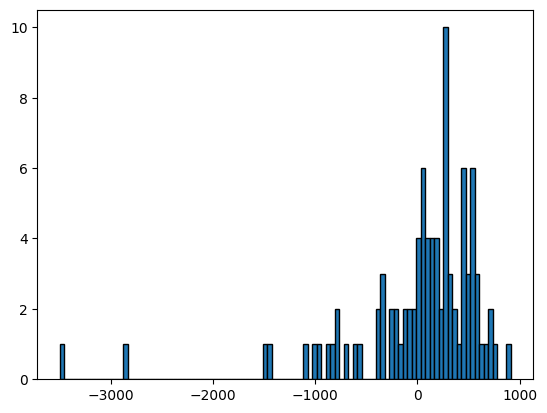

In [ ]:

# Sum up the values along each row
row_sums = shifted_df_z.sum(axis=1)




In [ ]:

df_z.head()

A0A024RBG1  A0A096LP01  A0A0B4J2D5  A0A0B4J2F0  A0A0U1RRL7    A0AV96  \
0    1.155859    0.597603   -1.658151         NaN         NaN  0.129911   
1   -1.294019   -0.761147   -0.685039         NaN         NaN -0.919079   
2    1.019427    0.416385   -0.296634         NaN         NaN  1.117867   
3    0.385227         NaN    1.585201         NaN         NaN -0.814869   
4   -1.840000    0.114777   -0.628283   -0.407275         NaN -0.228485   

     A0AVF1    A0AVT1    A0FGR8    A0JLT2  ...    Q9Y6W3    Q9Y6W5    Q9Y6X2  \
0  0.176487 -0.446325  1.425137  1.055702  ...  0.625936 -0.072598       NaN   
1  1.049838 -0.013420 -0.239757  0.846791  ...  0.500880 -0.336771  0.179424   
2  0.791641 -0.620157  0.499852  1.176910  ...  0.625936  0.259823       NaN   
3  2.025082  0.567907 -0.637333  1.096438  ... -1.183721  0.691009  1.329826   
4  0.143075  0.077615 -0.663155 -0.207561  ... -0.208237  1.005823       NaN   

     Q9Y6X3    Q9Y6X4    Q9Y6X5    Q9Y6X8    Q9Y6X9    Q9Y6Y0    Q9Y6Y8  
0  0.824264  1.207338 -0.858680  1.189947  0.243805  0.251033  0.206858  
1 -0.405672 -0.175132  0.909221  1.222714 -0.754186  0.288144 -1.575674  
2  0.580166 -0.412626 -1.136955  0.233751 -0.138651  0.281067  0.527486  
3 -1.822803 -0.263998  0.828733 -1.441342  0.667026  0.098670 -1.270802  
4  0.368652 -0.111930  1.099519  0.126035 -0.151982 -0.498395 -0.788262  

[5 rows x 8543 columns]

# Legacy

In [ ]:





onenorm_df_dropped=onenorm_df.dropna(axis=1, thresh=len(onenorm_df)*0)
onenorm_df_dropped.head()
#now doing the standard deviation process again
plt.title('Standard deviation of proteins (values normalized between 0 and 1),>80% observed')
plt.hist(onenorm_df_dropped.std(axis=0), bins=np.arange(0, .22, 0.005), edgecolor='black')
plt.xlabel('Standard deviation of proteins')
plt.ylabel('Frequency')
plt.show()

std_devs=onenorm_df_dropped.std(axis=0).sort_values(ascending=False)
std_devs_greater_0_08=std_devs[std_devs > 0.07]
keys_greater_0_08=std_devs_greater_0_08.index.tolist()
print(keys_greater_0_08)

for i in keys_greater_0_08:
    ratio=onenorm_df[i].isnull().sum()/len(onenorm_df[i])
    print(i)
    print(ratio)
